# **KELOMPOK 3**

Prediksi Pengeluaran Konsumen 

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

In [ ]:
!wget -O konsumen.csv https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv

--2021-10-27 01:38:32--  https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340501 (5.1M) [text/plain]
Saving to: ‘konsumen.csv’

konsumen.csv        100%[===================>]   5.09M  --.-KB/s    in 0.09s   

2021-10-27 01:38:32 (55.1 MB/s) - ‘konsumen.csv’ saved [5340501/5340501]



In [ ]:
#Menampilkan data
df = pd.read_csv('konsumen.csv', delimiter=';', skiprows=0, low_memory=False)
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [ ]:
# Menghapus data yang tidak perlu
df=df.drop(columns=['BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'KETERANGAN','SALES DATE', 'TANGGAL LAHIR'])

# **Data Acquisition**

In [ ]:
df.head()

,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KEWARGANEGARAAN
0,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),WNI
1,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),WNI
2,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),WNI
3,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,WNI
4,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),WNI


In [ ]:
# LIST DATA SEBELUM ENCODING

list2=['STATUS RUMAH','JENIS KELAMIN','TYPE MOTOR','PEKERJAAN','PENDIDIKAN','SMH DIGUNAKAN UNTUK','YG MENGGUNAKAN SMH','HOBI']
for i in list2:
  print(df.groupby(i).size())
  print("""
  
        """)

STATUS RUMAH
RUMAH ORANG TUA / KELUARGA     3654
RUMAH SENDIRI                 14863
RUMAH SEWA                       99
dtype: int64

  
        
JENIS KELAMIN
LAKI-LAKI    10385
PEREMPUAN     8231
dtype: int64

  
        
TYPE MOTOR
ADV150 ABS                 46
ADV150 CBS                150
ALL NEW CBR150R             4
ALL NEW SCOOPY           5031
ALL NEW SONIC 150 R        36
BEAT POP CBS ISS            1
BEAT SPORTY CBS          1649
BEAT SPORTY CBS ISS      1211
BEAT SPORTY CW           1069
BEAT STREET CBS           476
CB150 VERZA CW             26
CB150 VERZA SW              7
CB150R STREETFIRE SE      149
CB150R STREETFIRE STD      46
CBR 250RR ABS               6
CBR 250RR STD               6
CRF150L                    76
FORZA                       3
GENIO CBS                 390
GENIO CBS ISS             317
NEW CBR 150R ABS           14
NEW CBR 150R STD          134
NEW SUPRA X 125 FI CW     143
NEW SUPRA X 125 FI SW       6
NEW VARIO 125 CBS ISS      26
NEW VARIO 150 

In [ ]:
print(df.groupby('PENGELUARAN').size())

PENGELUARAN
<= RP 700.000,-                       593
> RP 4.000.000,-                       65
RP 1.000.001,- S/D RP 1.500.000,-    5961
RP 1.500.001,- S/D RP 2.000.000,-    4703
RP 2.000.001,- S/D RP 3.000.000,-    4988
RP 3.000.001,- S/D RP 4.000.000,-    1399
RP 700.001,- S/D RP 1.000.000,-       907
dtype: int64


# DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TYPE MOTOR              18616 non-null  object
 1   COLOR                   18616 non-null  object
 2   KODE CUSTOMER           18616 non-null  object
 3   JENIS KELAMIN           18616 non-null  object
 4   KECAMATAN SURAT         18616 non-null  object
 5   KOTA SURAT              18616 non-null  object
 6   PROPINSI                18616 non-null  object
 7   STATUS RUMAH            18616 non-null  object
 8   JENIS PENJUALAN STNK    18616 non-null  object
 9   JENIS PENJUALAN SSU     18616 non-null  object
 10  AGAMA                   18616 non-null  object
 11  PEKERJAAN               18616 non-null  object
 12  PENGELUARAN             18616 non-null  object
 13  PENDIDIKAN              18616 non-null  object
 14  KEBERSEDIAAN DIHUBUNGI  18616 non-null  object
 15  ME

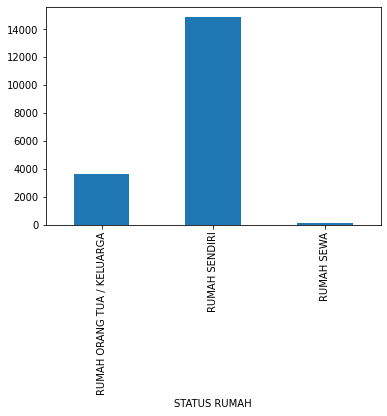

In [ ]:
df.groupby('STATUS RUMAH').size().plot(kind="bar")


In [ ]:
df['JENIS KELAMIN'].value_counts()

LAKI-LAKI    10385
PEREMPUAN     8231
Name: JENIS KELAMIN, dtype: int64

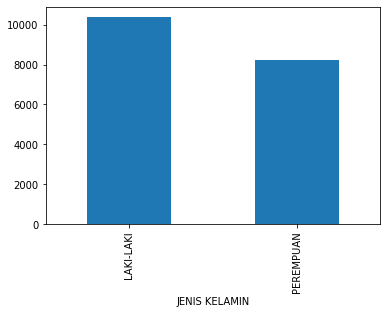

In [ ]:
df.groupby('JENIS KELAMIN').size().plot(kind="bar")

In [ ]:
df.groupby('SMH DIGUNAKAN UNTUK').size() #OUTput

SMH DIGUNAKAN UNTUK
BEKERJA                   154
BERDAGANG                8443
KE SEKOLAH/ KE KAMPUS     660
KEBUTUHAN KELUARGA       2428
LAIN-LAIN                 532
PEMAKAIAN JARAK DEKAT    6365
REKREASI/ OLAH RAGA        34
dtype: int64

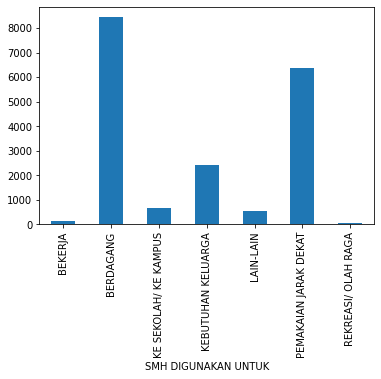

In [ ]:
df.groupby('SMH DIGUNAKAN UNTUK').size().plot(kind="bar")

**DATA PREPARATION**

In [ ]:
df.isna().sum() # Melihat jumlah NaN

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           6
dtype: int64

In [ ]:
df.dropna(inplace=True) # Menghilangkan NaN

In [ ]:
df.isna().sum()

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           0
dtype: int64

In [ ]:
#Mengencode Data Kategorikal (Data Acquisition)

list_1=list(df.columns)
list_1

['TYPE MOTOR',
 'COLOR',
 'KODE CUSTOMER',
 'JENIS KELAMIN',
 'KECAMATAN SURAT',
 'KOTA SURAT',
 'PROPINSI',
 'STATUS RUMAH',
 'JENIS PENJUALAN STNK',
 'JENIS PENJUALAN SSU',
 'AGAMA',
 'PEKERJAAN',
 'PENGELUARAN',
 'PENDIDIKAN',
 'KEBERSEDIAAN DIHUBUNGI',
 'MERK MOTOR SBLMNYA',
 'TYPE MOTOR SBLMNYA',
 'SMH DIGUNAKAN UNTUK',
 'YG MENGGUNAKAN SMH',
 'HOBI',
 'KEWARGANEGARAAN']

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)
list_cate

['TYPE MOTOR',
 'COLOR',
 'KODE CUSTOMER',
 'JENIS KELAMIN',
 'KECAMATAN SURAT',
 'KOTA SURAT',
 'PROPINSI',
 'STATUS RUMAH',
 'JENIS PENJUALAN STNK',
 'JENIS PENJUALAN SSU',
 'AGAMA',
 'PEKERJAAN',
 'PENGELUARAN',
 'PENDIDIKAN',
 'KEBERSEDIAAN DIHUBUNGI',
 'MERK MOTOR SBLMNYA',
 'TYPE MOTOR SBLMNYA',
 'SMH DIGUNAKAN UNTUK',
 'YG MENGGUNAKAN SMH',
 'HOBI',
 'KEWARGANEGARAAN']

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import library Encoder 
le=LabelEncoder() 

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i]) #Proses Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 18615
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   TYPE MOTOR              18610 non-null  int64
 1   COLOR                   18610 non-null  int64
 2   KODE CUSTOMER           18610 non-null  int64
 3   JENIS KELAMIN           18610 non-null  int64
 4   KECAMATAN SURAT         18610 non-null  int64
 5   KOTA SURAT              18610 non-null  int64
 6   PROPINSI                18610 non-null  int64
 7   STATUS RUMAH            18610 non-null  int64
 8   JENIS PENJUALAN STNK    18610 non-null  int64
 9   JENIS PENJUALAN SSU     18610 non-null  int64
 10  AGAMA                   18610 non-null  int64
 11  PEKERJAAN               18610 non-null  int64
 12  PENGELUARAN             18610 non-null  int64
 13  PENDIDIKAN              18610 non-null  int64
 14  KEBERSEDIAAN DIHUBUNGI  18610 non-null  int64
 15  MERK MOTOR SBLMNYA 

In [ ]:
for i in list2:
  print(df.groupby(i).size())
  print("""
  
        """)

STATUS RUMAH
0     3654
1    14857
2       99
dtype: int64

  
        
JENIS KELAMIN
0    10382
1     8228
dtype: int64

  
        
TYPE MOTOR
0       46
1      150
2        4
3     5028
4       36
5        1
6     1649
7     1211
8     1069
9      476
10      26
11       7
12     149
13      46
14       6
15       6
16      76
17       3
18     390
19     317
20      14
21     134
22     143
23       6
24      23
25      15
26     514
27    1380
28       3
29      25
30      35
31       3
32      13
33    1911
34    1528
35    2167
dtype: int64

  
        
PEKERJAAN
0       29
1      337
2     2655
3       11
4     3399
5        1
6       14
7      307
8     5819
9     1057
10     430
11      68
12     100
13     228
14     756
15     563
16     149
17     862
18     246
19      71
20     491
21      30
22     987
dtype: int64

  
        
PENDIDIKAN
0      970
1       38
2      697
3     1173
4    13765
5     1816
6      151
dtype: int64

  
        
SMH DIGUNAKAN UNTUK
0     154


In [ ]:
print(df.groupby("PENGELUARAN").size())

PENGELUARAN
0     593
1      65
2    5961
3    4703
4    4982
5    1399
6     907
dtype: int64


# MODELING
**SPLITTING DATA**

In [ ]:
y = df[['PENGELUARAN']] # Variabel Terikat
X = df[['STATUS RUMAH','JENIS KELAMIN','TYPE MOTOR','PEKERJAAN','PENDIDIKAN','SMH DIGUNAKAN UNTUK','YG MENGGUNAKAN SMH','HOBI']] # Variabel Bebas 

In [ ]:
y.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 18615
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PENGELUARAN  18610 non-null  int64
dtypes: int64(1)
memory usage: 290.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18610 entries, 0 to 18615
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   STATUS RUMAH         18610 non-null  int64
 1   JENIS KELAMIN        18610 non-null  int64
 2   TYPE MOTOR           18610 non-null  int64
 3   PEKERJAAN            18610 non-null  int64
 4   PENDIDIKAN           18610 non-null  int64
 5   SMH DIGUNAKAN UNTUK  18610 non-null  int64
 6   YG MENGGUNAKAN SMH   18610 non-null  int64
 7   HOBI                 18610 non-null  int64
dtypes: int64(8)
memory usage: 1.3 MB


# Import Algoritma Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier  # Algoritma yang dipakai
from sklearn.model_selection import  train_test_split # Pembagian Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train) 

y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Akurasi Random Forest : {accuracy_score(y_test,y_pred)}")

Akurasi Random Forest : 0.7576571735626008


In [ ]:
print("Silahkan Masukkan Data Anda !") 

STATUS_RUMAH =float(input("STATUS RUMAHMU APA : "))   
JENIS_KELAMIN=float(input("JENIS KELAMIN : "))
TYPE_MOTOR = float(input("TIPE MOTOR : "))
PEKERJAAN = float(input("PEKERJAAN : "))
PENDIDIKAN = float(input("PENDIDIKAN : "))
SMH_DIGUNAKAN_UNTUK = float(input("SMH DIGUNAKAN UNTUK : "))
YG_MENGGUNAKAN_SMH =float(input("YG_MENGGUNAKAN_SMH : "))
HOBI = float(input("HOBI : "))

output = clf.predict([[STATUS_RUMAH,JENIS_KELAMIN,TYPE_MOTOR,PEKERJAAN,PENDIDIKAN,SMH_DIGUNAKAN_UNTUK,YG_MENGGUNAKAN_SMH,HOBI]])

print(f'\n Prediksi Pengeluaranmu adalah {output}')

Silahkan Masukkan Data Anda !
STATUS RUMAHMU APA : 1
JENIS KELAMIN : 1
TIPE MOTOR : 14
PEKERJAAN : 4
PENDIDIKAN : 0
SMH DIGUNAKAN UNTUK : 3
YG_MENGGUNAKAN_SMH : 3
HOBI : 7

 Prediksi Pengelu7aranmu adalah [0]


# Evaluasi

REFERENSI

In [ ]:
10240337